In [1]:
%matplotlib inline
import os
import glob
import pylab
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 5)
import seaborn as sns
sns.set_style('whitegrid')

import matplotlib.colors
from matplotlib.dates import date2num
from datetime import datetime

from pysurvey.plot import setup_sns as setup
from pysurvey.plot import minmax, icolorbar, density, legend, text, dateticks

In [9]:
# Only includes up to 2014
# df = pd.read_csv('/Users/ajmendez/data/reddit/subreddit_numbers_eachyear.csv')
# includes out to 2016
df = pd.read_csv('/Users/ajmendez/data/reddit/subreddit_eachyear2_v1.csv', index_col=0)
df

,subreddit,year,bin,count,nauthor,ntotal,nunique,nyear,ngoodyear,age
0,zyzz,2016,1988,1,2,3,3,4,0,28
1,zyzz,2016,1991,1,2,3,3,4,0,25
...,...,...,...,...,...,...,...,...,...,...
511611,bugs,2007,2019,1,1,1,1,8,0,-12
511612,ads,2007,2000,1,1,1,1,10,0,7


In [292]:
df['age'] = df['year'] - df['bin']

In [244]:
# Update the unique, and totals for simple filtering.
df['ntotal'] = df['nunique'] = 0
for (subreddit, year), d in df.groupby(['subreddit', 'year']):
    isgood = (df['subreddit'] == subreddit) & (df['year'] == year)
    df.loc[isgood, ['ntotal', 'nunique']]  = np.sum(d['count']), len(d)

In [245]:
df['nyear'] = 0
for subreddit, d in df.groupby('subreddit'):
    isgood = (df['subreddit'] == subreddit)
    df.loc[isgood, 'nyear'] = len(np.unique(d['year']))

In [246]:
df['ngoodyear'] = 0
isgood = (df['ntotal'] > 10) & (df['nunique'] > 5)
for subreddit,d in df[isgood].groupby('subreddit'):
    df.loc[isgood & (df['subreddit'] == subreddit), 'ngoodyear'] = len(np.unique(d['year']))

In [293]:
# df.to_csv('/Users/ajmendez/data/reddit/subreddit_numbers_eachyear_v1.csv')
df.to_csv('/Users/ajmendez/data/reddit/subreddit_eachyear2_v1.csv')

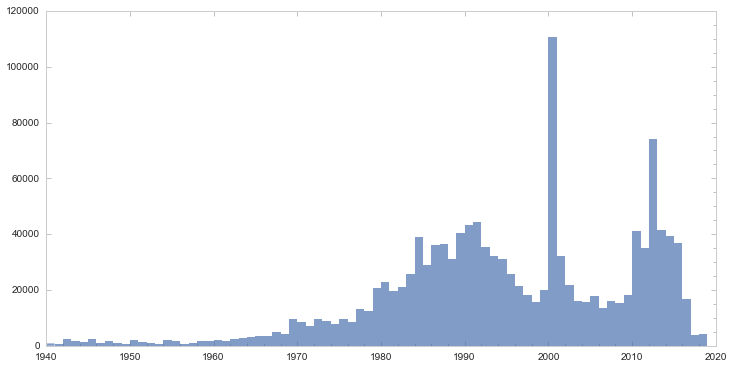

In [296]:
setup(figsize=(12,6))
_ = pylab.hist(df['bin'], weights=df['count'], bins=np.arange(1940, 2020, 1), lw=0, alpha=0.7)

In [304]:
numbers = df[df['bin'] != 2000]

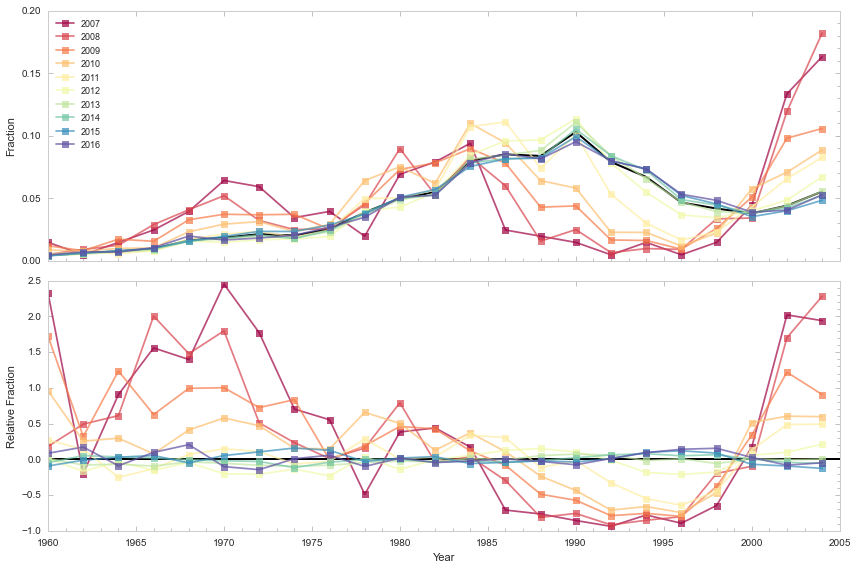

In [305]:
yearnorm = matplotlib.colors.Normalize(2007,2016)
bins = np.arange(1960, 2007, 2)

V,L = np.histogram(numbers['bin'], bins=bins, weights=numbers['count'])
setup(figsize=(12,8))
for k,(year, d) in enumerate(numbers.groupby('year'),1):
    ax = setup(subplt=(2,1,1), xlabel='Year', ylabel='Fraction', xticks=False)
    if k == 1:
        pylab.plot(L[:-1], V*1.0/np.sum(V), lw=2, color='k')

    v,l = np.histogram(d['bin'], bins=bins, weights=d['count'])
    pylab.plot(l[:-1], v*1.0/np.sum(v),  '-s', alpha=0.7,
                   color=pylab.cm.Spectral(yearnorm(year)), label=year)
    ax2 = setup(subplt=(2,1,2), xlabel='Year', ylabel='Relative Fraction')
    if k == 1:
        pylab.axhline(0, color='k', lw=2)
    pylab.plot(l[:-1], v*1.0/np.sum(v) / (V*1.0 / np.sum(V)) - 1,  '-s', alpha=0.7, 
                   color=pylab.cm.Spectral(yearnorm(year)), label=year)
    
legend(ax=ax, loc=2)
pylab.tight_layout()

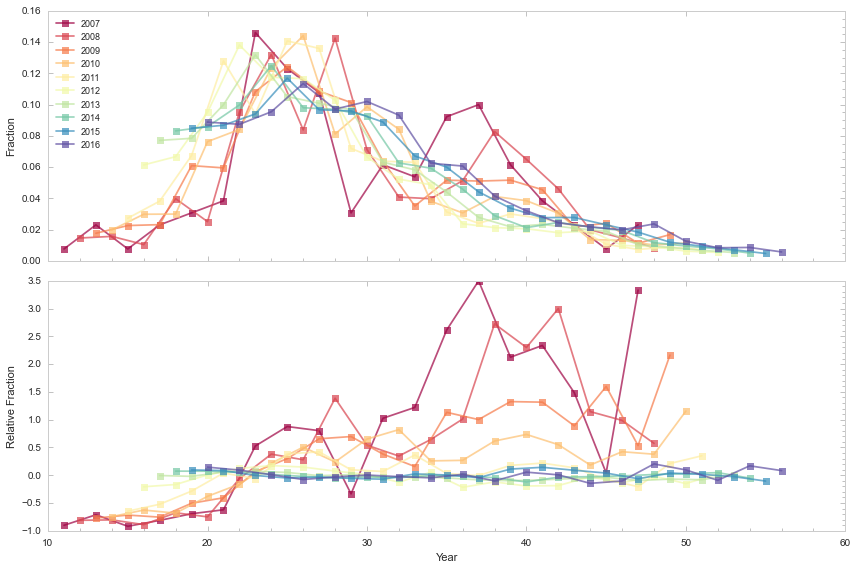

In [312]:
yearnorm = matplotlib.colors.Normalize(2007,2016)
bins = np.arange(1960, 2000, 2)

V,L = np.histogram(numbers['bin'], bins=bins, weights=numbers['count'])
setup(figsize=(12,8))
for k,(year, d) in enumerate(numbers.groupby('year'),1):
    color = pylab.cm.Spectral(yearnorm(year))
    ax = setup(subplt=(2,1,1), xlabel='Year', ylabel='Fraction', xticks=False)
    v,l = np.histogram(d['bin'], bins=bins, weights=d['count'])
    pylab.plot(year-l[:-1], v*1.0/np.sum(v),  '-s', alpha=0.7, color=color, label=year)
    
    
    ax2 = setup(subplt=(2,1,2), xlabel='Year', ylabel='Relative Fraction')
    pylab.plot(year-l[:-1], v*1.0/np.sum(v) / (V*1.0 / np.sum(V)) - 1,  '-s', alpha=0.7, color=color, label=year)
    
legend(ax=ax, loc=2)
pylab.tight_layout()

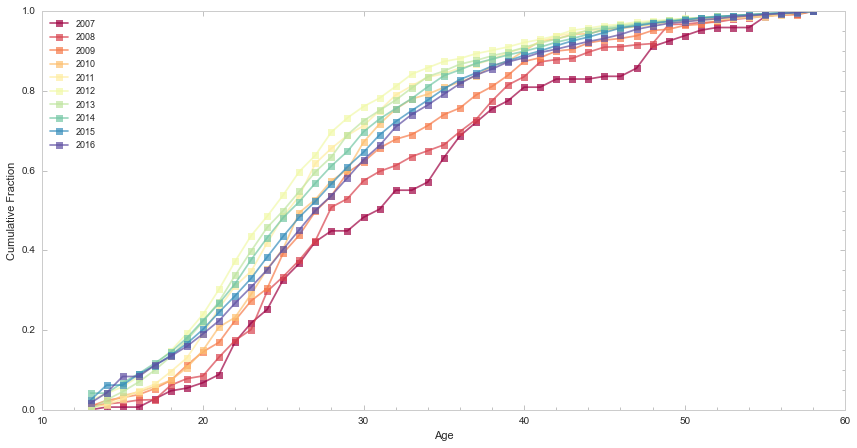

In [303]:
## yearnorm = matplotlib.colors.Normalize(2007,2016)


setup(figsize=(12,12))
out = np.zeros( (3, 10) )
for k,(year, d) in enumerate(numbers.groupby('year')):
    ax = setup(subplt=(2,1,1), xlabel='Age', ylabel='Cumulative Fraction', xticks=True)
#     pylab.axhline(0.5)
    color = pylab.cm.Spectral(yearnorm(year))
    bins = np.arange(13,60,1)
    v,l = np.histogram(d['year'] - d['bin'], bins=bins, weights=d['count'])
    
    x = l[:-1]
    y = np.cumsum(v)*1.0/np.sum(v)
    
#     avg = np.average(year-d['bin'], weights=d['count'])
    avg = np.interp([0.25, 0.5, 0.75], y, x)
#     pylab.plot(avg, 0.5, 's', markersize=20, color=color)
    out[:, k] = year, avg[1], (avg[2]-avg[0])/2.0
#     pylab.axvline(avg, lw=2, alpha=0.5, color=color)
    pylab.plot(x, y,  '-s', alpha=0.7,
                   color=color, label=year)

    
legend(loc=2)
pylab.tight_layout()

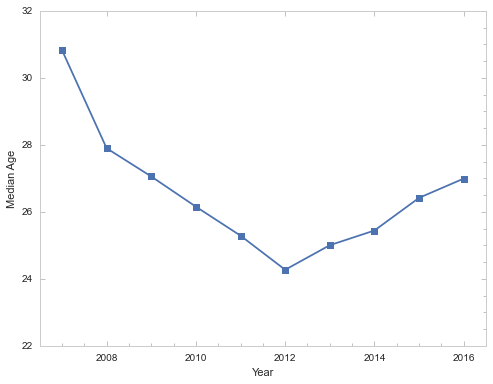

In [290]:
ax = setup(figsize=(8,6), 
           xlabel='Year', xr=[2006.5, 2016.5], 
           ylabel='Median Age', yr=[22, 32])
ax.get_xaxis().get_major_formatter().set_useOffset(False)
pylab.plot(out[0], out[1], '-s')

In [313]:
numbers = df[(df['ngoodyear'] == 10) & (df['year'] != 2000) & (df['year'] != 2001) ]
print np.unique(numbers['subreddit']), len(np.unique(numbers['subreddit']))

['entertainment' 'politics' 'programming' 'science'] 4


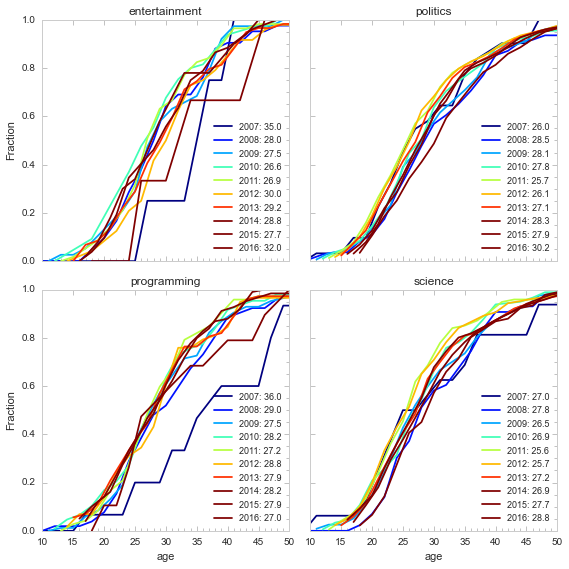

In [314]:
yearnorm = matplotlib.colors.Normalize(2007,2014)
setup(figsize=(8,8))
for k,(subreddit, d) in enumerate(numbers.groupby('subreddit'),1):
    ax = setup(subplt=(2,2,k), title=subreddit, autoticks=True,
              xlabel='age', xr=[10,50], 
               ylabel='Fraction', yr=[0,1])
#     pylab.axvspan(-20, 20, color='0.5', alpha=0.3, zorder=-2),
    for i, (year, e) in enumerate(d.groupby('year')):
        bins = np.arange(year-1998,60, 2)
        v,l = np.histogram(e['year'] - e['bin'], bins=bins, weights=e['count'])
        y = np.cumsum(v)*1.0/v.sum()
        age = np.interp([0.5], y, l[:-1])[0]
        pylab.plot(l[:-1], y,
                   color=pylab.cm.jet(yearnorm(year)), 
                   label='{}: {:0.1f}'.format(year, age))
    legend(loc=4)
#     break
pylab.tight_layout()

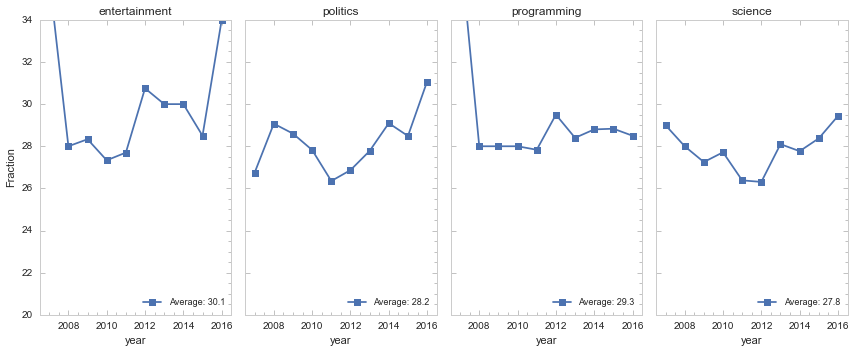

In [315]:
yearnorm = matplotlib.colors.Normalize(2007,2014)
setup(figsize=(12,5))
for k,(subreddit, d) in enumerate(numbers.groupby('subreddit'),1):
    ax = setup(subplt=(1,4,k), title=subreddit, autoticks=True,
              xlabel='year', xr=[2006.5,2016.5], 
               ylabel='Fraction', yr=[20,34])
    ax.get_xaxis().get_major_formatter().set_useOffset(False)
    
    out = np.zeros( (2, 10) )
    for i, (year, e) in enumerate(d.groupby('year')):
        bins = np.arange(year-1999,60, 1)
        v,l = np.histogram(e['year'] - e['bin'], bins=bins, weights=e['count'])
        x, y = l[:-1], np.cumsum(v)*1.0/np.sum(v)
        avg = np.interp([0.5], y, x)
        out[:, i] = year, avg
    pylab.plot(out[0], out[1], '-s', label='Average: {:0.1f}'.format(np.mean(out[1])))
    legend(loc=4)
pylab.tight_layout()

In [325]:
numbers = df[df['ngoodyear'] >= 8]
print np.unique(numbers['subreddit']), len(np.unique(numbers['subreddit']))

['AskReddit' 'Christianity' 'Cooking' 'DoesAnybodyElse' 'Drugs' 'Economics'
 'Fitness' 'Frugal' 'Health' 'IAmA' 'Libertarian' 'Marijuana' 'MensRights'
 'Music' 'SuicideWatch' 'WTF' 'WeAreTheMusicMakers' 'apple' 'atheism' 'aww'
 'bestof' 'books' 'business' 'canada' 'comics' 'conspiracy' 'economy'
 'entertainment' 'environment' 'fffffffuuuuuuuuuuuu' 'food' 'funny'
 'gadgets' 'gaming' 'geek' 'gonewild' 'guns' 'humor' 'linux' 'math'
 'movies' 'news' 'nsfw' 'offbeat' 'philosophy' 'photography' 'pics'
 'politics' 'programming' 'promos' 'relationship_advice' 'science' 'scifi'
 'self' 'sex' 'space' 'sports' 'technology' 'todayilearned' 'videos'
 'web_design' 'wikipedia' 'worldnews' 'worldpolitics'] 64


In [327]:
subreddit_ages = []
for k,(subreddit, d) in enumerate(numbers.groupby('subreddit')):
    out = np.zeros( (3, 10) )
    for i, (year, e) in enumerate(d.groupby('year')):
        bins = np.arange(year-1999,60, 2)
        v,l = np.histogram(e['year'] - e['bin'], bins=bins, weights=e['count'])
        x, y = l[:-1], np.cumsum(v)*1.0/np.sum(v)
        avg = np.interp([0.25, 0.5, 0.75], y, x)
        out[:, i] = year, avg[1], avg[2] - avg[0]
    tmp = np.mean(out[1][out[1] > 0])
    tmp2 = np.mean(out[2][out[2] > 0])
    subreddit_ages.append([subreddit, tmp, tmp2, len(d)])
for i,(subreddit, age, std, nobs) in enumerate(sorted(subreddit_ages, key=lambda x: -x[1])):
    print '{:15s} {: 4.1f} {:4.1f} {:8d}'.format(subreddit, age, std, nobs)

scifi            30.5 14.0      392
environment      29.6 13.2      272
offbeat          29.2 12.3      447
entertainment    29.0 11.2      375
economy          28.9 10.1      168
Cooking          28.3 11.3      342
programming      28.3 12.1      484
books            28.3 11.3      554
Frugal           28.2 10.0      410
conspiracy       27.8 11.6      431
business         27.7 11.7      394
gadgets          27.7 12.2      375
linux            27.6 11.1      308
Health           27.5 11.9      279
guns             27.4 10.7      455
nsfw             27.0 12.5      491
politics         27.0 12.2      870
web_design       27.0  8.6      260
worldpolitics    27.0 12.1      285
Economics        26.8 14.8      369
news             26.8 12.5      663
science          26.7 11.4      700
canada           26.6 10.4      411
technology       26.6 10.9      720
humor            26.5  9.3      257
geek             26.3  9.9      378
photography      26.2 10.3      332
atheism          26.2 11.7  

In [11]:
numbers = df[df['nunique'] >= 20]
print len(np.unique(numbers['subreddit']))

2523


In [13]:
subreddit_map = {}
for k,(subreddit, d) in enumerate(numbers.groupby('subreddit')):
    out = np.zeros( (3, 10) )
    for i, (year, e) in enumerate(d.groupby('year')):
        bins = np.arange(year-1999,60, 2)
        v,l = np.histogram(e['year'] - e['bin'], bins=bins, weights=e['count'])
        x, y = l[:-1], np.cumsum(v)*1.0/np.sum(v)
        avg = np.interp([0.25, 0.5, 0.75], y, x)
        out[:, i] = year, avg[1], avg[2] - avg[0]
    tmp = np.mean(out[1][out[1] > 0])
    tmp2 = np.mean(out[2][out[2] > 0])
    subreddit_map[subreddit] = [tmp, tmp2, len(d)]

In [16]:
import json
json.dump(subreddit_map, open('/Users/ajmendez/data/reddit/subreddit_ages.json', 'w'), indent=2)